<a href="https://colab.research.google.com/github/sanjeev12-09/Polynomial-Regression-From-Scratch/blob/main/polynomial_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Libraries



In [ ]:
from IPython.display import display,Math,Latex

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# LinReg class

In [ ]:
class LinReg(object):

  def __init__(self):
    self.t0=200
    self.t1=1000

  def predict(self, X:np.ndarray) -> np.ndarray:
    y= X @ self.w
    return y 

  def loss(self, X:np.ndarray,y:np.ndarray) -> float:
    e= y - self.predict(X)
    return 1/2 * (np.transpose(e) @ e) 

  def rmse(self, X:np.ndarray , y:np.ndarray) -> float:
    return np.sqrt((2/X.shape[0]) * self.loss(X,y))

  def fit(self, X:np.ndarray , y:np.ndarray) -> np.ndarray:
    self.w = np.zeros((X.shape))
    eye = np.eye(np.size(X, 1))
    self.w = np.linalg.pinv(X) @ y 
    return self.w

  def calculate_gradient(self, X:np.ndarray , y:np.ndarray) -> np.ndarray:
    return np.transpose(X) @ (self.predict(X)-y) 

  def update_weights(self, grad:np.ndarray , lr:float) -> np.ndarray:
    return self.w - lr*grad

  def learning_schedule(self,t):
    return self.t0/(t + self.t1)

  def gd(self, X:np.ndarray , y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0, num_epochs):
      dJdW = self.calculate_gradient(X, y)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(x,y))
      self.w=self.update_weights(dJdW, lr)

    return self.w

  def mbgd(self, X:np.ndarray , y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0
    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0, X.shape[0], batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi , yi))
        dJdW = 2/batch_size * self.calculate_gradient(xi, yi)
        self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

    return self.w

  def sgd(self, X:np.ndarray , y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X[0])
        xi = X[random_index : 1+ random_index]
        yi = y[random_index : 1+ random_index]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi , yi))

        gradients = 2*self.calculate_gradient(xi, yi)
        lr = self.learning_schedule(epoch * X.shape[0] + i)
        self.w = self.update_weights(gradients , lr)

    return self.w



# Polynomial Regression

In [ ]:
import itertools
import functools

def get_combinations(x , degree):
  return itertools.combinations_with_replacement(x, degree)

def compute_new_feature(items):
  #reduce(lambda x,y: x*y, [1,2,3,4]) calculate (((1*2)*3)*4)
  return functools.reduce(lambda x,y: x*y, items)

Lets run few get_combination example

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([1,2],2)}

{(1, 1): 1, (1, 2): 2, (2, 2): 4}

In [ ]:
{items: compute_new_feature(items) for items in get_combinations([2,4],3)}

{(2, 2, 2): 8, (2, 2, 4): 16, (2, 4, 4): 32, (4, 4, 4): 64}

In [ ]:
len({items: compute_new_feature(items) for items in get_combinations([1,2,3,4,5],4)})


70

In [ ]:
import itertools
import functools
import numpy as np

def polynomial_transform(x,degree, logging=False):
  if x.ndim == 1:
    x=x[:, None]

  x_t = x.transpose()
  features = [np.ones(len(x))]

  if logging:
    print("Input:", x)
  for degree in range(1,degree+1):
    for items in get_combinations(x_t, degree):
      features.append(compute_new_feature(items))
      if logging:
        print(items, ":", compute_new_feature(items))

  if logging:
    print(np.asarray(features).transpose())

  return np.asarray(features).transpose()



In [ ]:
polynomial_transform(np.array([5]),0, logging=True)

Input: [[5]]
[[1.]]


array([[1.]])

In [ ]:
polynomial_transform(np.array([1,3]),3, logging=True)

Input: [[1]
 [3]]
(array([1, 3]),) : [1 3]
(array([1, 3]), array([1, 3])) : [1 9]
(array([1, 3]), array([1, 3]), array([1, 3])) : [ 1 27]
[[ 1.  1.  1.  1.]
 [ 1.  3.  9. 27.]]


array([[ 1.,  1.,  1.,  1.],
       [ 1.,  3.,  9., 27.]])

In [ ]:
polynomial_transform(np.array([[1,2],[7,9]]),2, logging=True)

Input: [[1 2]
 [7 9]]
(array([1, 7]),) : [1 7]
(array([2, 9]),) : [2 9]
(array([1, 7]), array([1, 7])) : [ 1 49]
(array([1, 7]), array([2, 9])) : [ 2 63]
(array([2, 9]), array([2, 9])) : [ 4 81]
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  7.  9. 49. 63. 81.]]


array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  7.,  9., 49., 63., 81.]])

In [ ]:
polynomial_transform(np.array([[1],[5],[2]]),2, logging=True)

Input: [[1]
 [5]
 [2]]
(array([1, 5, 2]),) : [1 5 2]
(array([1, 5, 2]), array([1, 5, 2])) : [ 1 25  4]
[[ 1.  1.  1.]
 [ 1.  5. 25.]
 [ 1.  2.  4.]]


array([[ 1.,  1.,  1.],
       [ 1.,  5., 25.],
       [ 1.,  2.,  4.]])

# Non linear data generation 

we generate training data with single feature *x1* and label *y = sin(2πx1) + noise.*

In [ ]:
def create_nonlin_training_set(func, sample_size, std):
  x = np.linspace(0, 1, sample_size)
  y= func(x) + np.random.normal(scale =std, size = x.shape)
  return x, y

def nonlin(x):
  return np.sin(2 * np.pi * x)

# Visualization of training data and model fitment

In [ ]:
def visualize_training_data(X_train, y_train):
  points = np.linspace(0,1,100)
  output = nonlin(points)

  plt.scatter(X_train, y_train, facecolor="none",edgecolor='b',
              s=50, label = "training data")
  plt.plot(points, output, c='g',label = '$\sin(2\pi x)$')
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def visualize_model_fit(X,y,lin_reg,degree):
  # plots train model along with data generation function
  points = np.linspace(0,1,100)
  output = nonlin(points)
  
  if degree > 0:
    plt.scatter(X, y, facecolor="none",edgecolor='b',s=50,
                label='training data')
    plt.plot(points, output, c='g',label = '$\sin(2\pi x)$')

    y_hat = lin_reg.predict(polynomial_transform(points, degree))
    plt.plot(points, y_hat, c='r', label= '$h_\mathbf{w} (x)$')
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.title("M={}".format(degree)) # xy = (-0.15, 1)

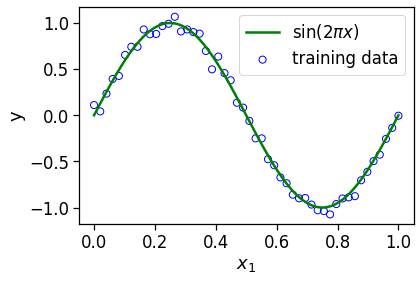

In [ ]:
num_samples=50
X, y =create_nonlin_training_set(nonlin, num_samples, 0.05)
visualize_training_data(X, y)

# Polynomial model

Lets train a this model on data

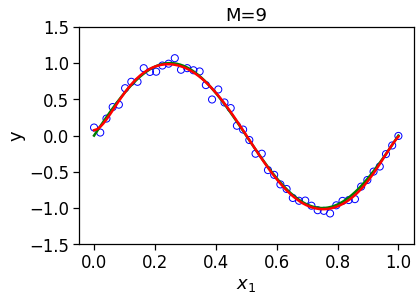

In [ ]:
degree = 9
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualize_model_fit(X, y, lin_reg, degree)

Lets train multiple polynomial regression with different degrees.

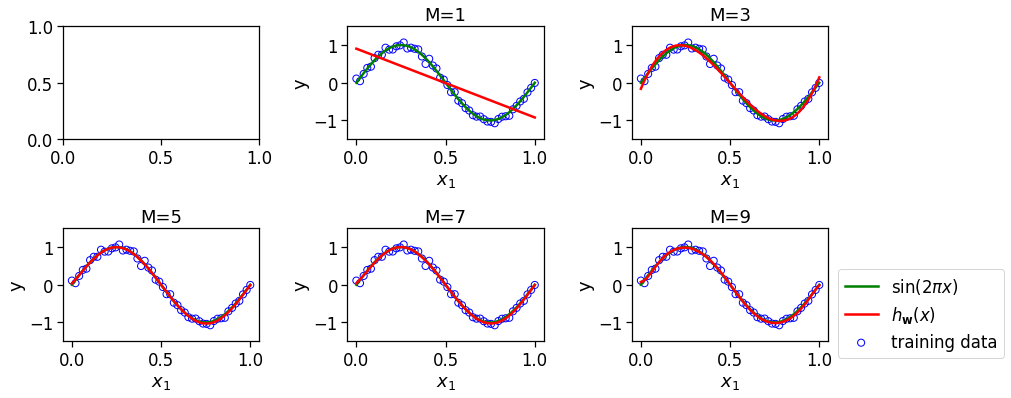

In [ ]:
f = plt.figure(figsize=(12,8))
sns.set_context("notebook", font_scale = 1.5, rc ={"lines.linewidth" : 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3,3,i+1)
  X_transform = polynomial_transform(X, degree)
  lin_reg = LinReg()
  lin_reg.fit(X_transform, y)
  visualize_model_fit(X, y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2, borderaxespad = 0.)
plt.show()

# Model selection

* one polynomial model per degree. which one to select?
* process
   * Fix the degree that yoy want toexperiment with.
   * divide the training data into training, validation and test test.
   * For each degree m :

        * Training polynomial regression model with training data

        * calculate training and validation error on trained model.

Select the model with lowest training and validation loss among all models.

In [ ]:
import pandas as pd

def convert_dict_to_df(w_dict, degree):
  poly_w_dict = {i:np.array(np.zeros(degree)) for i in range(degree)}
  for deg in poly_w_dict:
    weight_vec = w_dict[deg]
    for i in range(len(weight_vec)):
      poly_w_dict[deg][i] = weight_vec[i]

  poly_w_df = pd.DataFrame(poly_w_dict)
  poly_w_df.columns = ['w_'+str(i) for i in range(degree)]
  return poly_w_df

def plot_model_selection(training_errors, val_score):
  plt.plot(training_errors, 'o-', mfc= 'none', mec= "b", ms=10 , c='b')
  plt.plot(val_errors, 'o-', mfc= 'none', mec= "b", ms=10, c='r')
  plt.legend()
  plt.xlabel('degree')
  plt.ylabel('RMSE')
  plt.show()

No handles with labels found to put in legend.


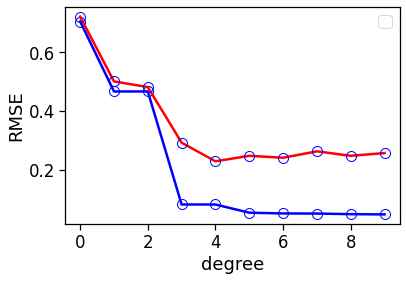

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,-0.004985,0.889783,0.878668,-0.198692,-0.204674,-0.052504,-0.092370,-0.104511,-0.075364,-0.091770
1,0.000000,-1.789534,-1.721457,11.899310,12.030937,6.718793,8.809269,9.734814,6.561545,9.095044
2,0.000000,0.000000,-0.068077,-34.466220,-35.072581,3.619598,-18.550176,-32.086648,29.476817,-33.812144
3,0.000000,0.000000,0.000000,22.932095,23.881562,-80.809123,9.990640,87.761027,-384.015629,239.756098
4,0.000000,0.000000,0.000000,0.000000,-0.474733,117.869115,-54.133686,-271.482724,1537.502777,-1590.722268
5,0.000000,0.000000,0.000000,0.000000,0.000000,-47.337539,104.585965,419.985439,-3387.429422,5511.809968
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.641168,-279.101027,4189.534349,-10776.300286
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.274245,-2677.151831,12052.922725
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,685.606519,-7154.984834
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1742.353634


In [ ]:
training_errors =[]
val_errors = []
w_dict = {}

X_val = np.linspace(0,1,100)
y_val = nonlin(X_val)

for i in range(10):
  X_transform = polynomial_transform(X, i)
  X_val_transform = polynomial_transform(X_val, i)
  lin_reg = LinReg()
  lin_reg.fit(X_transform, y)

  w_dict[i] = lin_reg.w
  training_errors.append(lin_reg.rmse(X_transform, y))
  val_errors.append(lin_reg.rmse(X_val_transform, y_val+np.random.normal(scale=0.25, size = len(y_val))))

plot_model_selection(training_errors , val_errors)
convert_dict_to_df(w_dict, 10)

# LinReg class with regularization parameter

In [ ]:
class LinReg_regularization(object):

  def __init__(self):
    self.t0=200
    self.t1=1000

  def predict(self, X:np.ndarray) -> np.ndarray:
    y= X @ self.w
    return y 

  def loss(self, X:np.ndarray,y:np.ndarray,reg_rate:float) -> float:
    e= y - self.predict(X)
    return 1/2 * (np.transpose(e) @ e) + reg_rate/2 *(np.transpose(self.w) @ self.w)

  def rmse(self, X:np.ndarray , y:np.ndarray) -> float:
    return np.sqrt((2/X.shape[0]) * self.loss(X,y))

  def fit(self, X:np.ndarray , y:np.ndarray, reg_rate:float) -> np.ndarray:
    self.w = np.zeros((X.shape))
    eye = np.eye(np.size(X, 1))
    self.w = np.linalg.pinv(
        reg_rate * eye + X.T @ X,
        X.T @ y) 
    return self.w

  def calculate_gradient(self, X:np.ndarray , y:np.ndarray, reg_rate:float) -> np.ndarray:
    return np.transpose(X) @ (self.predict(X)-y) + reg_rate * self.w

  def update_weights(self, grad:np.ndarray , lr:float) -> np.ndarray:
    return self.w - lr*grad

  def learning_schedule(self,t):
    return self.t0/(t + self.t1)

  def gd(self, X:np.ndarray , y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0, num_epochs):
      dJdW = self.calculate_gradient(X, y)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(x,y))
      self.w=self.update_weights(dJdW, lr)

    return self.w

  def mbgd(self, X:np.ndarray , y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0
    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0, X.shape[0], batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi , yi))
        dJdW = 2/batch_size * self.calculate_gradient(xi, yi)
        self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

    return self.w

  def sgd(self, X:np.ndarray , y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X[0])
        xi = X[random_index : 1+ random_index]
        yi = y[random_index : 1+ random_index]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi , yi))

        gradients = 2*self.calculate_gradient(xi, yi)
        lr = self.learning_schedule(epoch * X.shape[0] + i)
        self.w = self.update_weights(gradients , lr)

    return self.w

# Ridge regularization

In [ ]:
f = plt.figure(figsize=(12,8))
sns.set_context("notebook", font_scale = 1.5, rc ={"lines.linewidth" : 2.5})

for i, degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3,3,i+1)
  X_transform = polynomial_transform(X, degree)
  lin_reg1 = LinReg_regularization()
  lin_reg1.fit(X_transform, y, reg_rate = 0.01)
  visualize_model_fit(X, y, lin_reg, degree, reg_rate = 0.01)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2, borderaxespad = 0.)
plt.show()

# Lasso regularization

In [ ]:
from sklearn.linear_model import Lasso

reg_rate = 0.01
lasso = Lasso(reg_rate)
lasso.fit(X_transform, y)

lin_reg = LinReg()
_ = lin_reg.fit(X_transform, y)

In [ ]:
pd.DataFrame({'lin_reg' : lin_reg.w , 'Lasso': lasso.coef_})

,lin_reg,Lasso
0,0.074092,0.000000
1,0.256170,-0.000000
2,119.014575,-2.786437
3,-1061.935023,-0.000000
4,4639.260378,-0.000000
5,-12165.620998,0.000000
6,19426.411575,0.000000
7,-18349.006769,0.000000
8,9416.025821,0.000000
9,-2024.494335,1.981295
